# Spectrum xAI

In [1]:
import torch
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
from tqdm import tqdm
import cv2
import matplotlib.pyplot as plt

from src.data.dataset import DAGMDataset
from src.models.models import DenseNetClassifier
from src.models.train_model import train_model
from src.models.evaluation import evaluate_model
from src.task.gradcam import show_grad_cam

c:\Users\ismoi\anaconda3\envs\ai\Lib\site-packages\torch\utils\_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [2]:
CLASS = 1
IMAGE_PATH = f"data/dataset/Class{CLASS}/"

In [3]:
transform = transforms.Compose([
    transforms.Resize((256, 256)),
    transforms.ToTensor(),
])

train_dataset = DAGMDataset(root_dir=IMAGE_PATH, split="Train", transform=transform)
test_dataset = DAGMDataset(root_dir=IMAGE_PATH, split="Test", transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

print(f"Train dataset size: {len(train_dataset)}")
print(f"Test dataset size: {len(test_dataset)}")

Train dataset size: 575
Test dataset size: 575


In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DenseNetClassifier(pretrained=True, device=device)

criterion = torch.nn.BCEWithLogitsLoss() 
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)

In [ ]:
train_accuracies, train_losses = train_model(model, train_loader, test_loader, criterion, optimizer, device, num_epochs=10)
model.save_model(f"data/models/densenet121_class{CLASS}.pt")

100%|██████████| 18/18 [00:25<00:00,  1.40s/it]


Epoch [1/10], Loss: 0.9089, Train Accuracy: 46.4348


100%|██████████| 18/18 [00:24<00:00,  1.36s/it]


Epoch [2/10], Loss: 0.7538, Train Accuracy: 94.0870


100%|██████████| 18/18 [00:24<00:00,  1.34s/it]


Epoch [3/10], Loss: 0.6701, Train Accuracy: 99.8261


100%|██████████| 18/18 [00:24<00:00,  1.35s/it]


Epoch [4/10], Loss: 0.6584, Train Accuracy: 99.8261


100%|██████████| 18/18 [00:24<00:00,  1.35s/it]


Epoch [5/10], Loss: 0.6508, Train Accuracy: 100.0000


100%|██████████| 18/18 [00:24<00:00,  1.35s/it]


Epoch [6/10], Loss: 0.6526, Train Accuracy: 99.4783


100%|██████████| 18/18 [00:24<00:00,  1.36s/it]


Epoch [7/10], Loss: 0.6513, Train Accuracy: 99.4783


100%|██████████| 18/18 [00:24<00:00,  1.38s/it]


Epoch [8/10], Loss: 0.6486, Train Accuracy: 99.8261


100%|██████████| 18/18 [00:25<00:00,  1.41s/it]


Epoch [9/10], Loss: 0.6474, Train Accuracy: 99.6522


100%|██████████| 18/18 [00:25<00:00,  1.44s/it]

Epoch [10/10], Loss: 0.6452, Train Accuracy: 100.0000


In [7]:
model.load_model(f"data/models/model_densenet121_class{CLASS}.pth")
test_accuracy = evaluate_model(model, test_loader, device)
print(f"Test Accuracy: {test_accuracy:.2f}%")

RuntimeError: Error(s) in loading state_dict for DenseNetClassifier:
	Missing key(s) in state_dict: "model.features.conv0.weight", "model.features.norm0.weight", "model.features.norm0.bias", "model.features.norm0.running_mean", "model.features.norm0.running_var", "model.features.denseblock1.denselayer1.norm1.weight", "model.features.denseblock1.denselayer1.norm1.bias", "model.features.denseblock1.denselayer1.norm1.running_mean", "model.features.denseblock1.denselayer1.norm1.running_var", "model.features.denseblock1.denselayer1.conv1.weight", "model.features.denseblock1.denselayer1.norm2.weight", "model.features.denseblock1.denselayer1.norm2.bias", "model.features.denseblock1.denselayer1.norm2.running_mean", "model.features.denseblock1.denselayer1.norm2.running_var", "model.features.denseblock1.denselayer1.conv2.weight", "model.features.denseblock1.denselayer2.norm1.weight", "model.features.denseblock1.denselayer2.norm1.bias", "model.features.denseblock1.denselayer2.norm1.running_mean", "model.features.denseblock1.denselayer2.norm1.running_var", "model.features.denseblock1.denselayer2.conv1.weight", "model.features.denseblock1.denselayer2.norm2.weight", "model.features.denseblock1.denselayer2.norm2.bias", "model.features.denseblock1.denselayer2.norm2.running_mean", "model.features.denseblock1.denselayer2.norm2.running_var", "model.features.denseblock1.denselayer2.conv2.weight", "model.features.denseblock1.denselayer3.norm1.weight", "model.features.denseblock1.denselayer3.norm1.bias", "model.features.denseblock1.denselayer3.norm1.running_mean", "model.features.denseblock1.denselayer3.norm1.running_var", "model.features.denseblock1.denselayer3.conv1.weight", "model.features.denseblock1.denselayer3.norm2.weight", "model.features.denseblock1.denselayer3.norm2.bias", "model.features.denseblock1.denselayer3.norm2.running_mean", "model.features.denseblock1.denselayer3.norm2.running_var", "model.features.denseblock1.denselayer3.conv2.weight", "model.features.denseblock1.denselayer4.norm1.weight", "model.features.denseblock1.denselayer4.norm1.bias", "model.features.denseblock1.denselayer4.norm1.running_mean", "model.features.denseblock1.denselayer4.norm1.running_var", "model.features.denseblock1.denselayer4.conv1.weight", "model.features.denseblock1.denselayer4.norm2.weight", "model.features.denseblock1.denselayer4.norm2.bias", "model.features.denseblock1.denselayer4.norm2.running_mean", "model.features.denseblock1.denselayer4.norm2.running_var", "model.features.denseblock1.denselayer4.conv2.weight", "model.features.denseblock1.denselayer5.norm1.weight", "model.features.denseblock1.denselayer5.norm1.bias", "model.features.denseblock1.denselayer5.norm1.running_mean", "model.features.denseblock1.denselayer5.norm1.running_var", "model.features.denseblock1.denselayer5.conv1.weight", "model.features.denseblock1.denselayer5.norm2.weight", "model.features.denseblock1.denselayer5.norm2.bias", "model.features.denseblock1.denselayer5.norm2.running_mean", "model.features.denseblock1.denselayer5.norm2.running_var", "model.features.denseblock1.denselayer5.conv2.weight", "model.features.denseblock1.denselayer6.norm1.weight", "model.features.denseblock1.denselayer6.norm1.bias", "model.features.denseblock1.denselayer6.norm1.running_mean", "model.features.denseblock1.denselayer6.norm1.running_var", "model.features.denseblock1.denselayer6.conv1.weight", "model.features.denseblock1.denselayer6.norm2.weight", "model.features.denseblock1.denselayer6.norm2.bias", "model.features.denseblock1.denselayer6.norm2.running_mean", "model.features.denseblock1.denselayer6.norm2.running_var", "model.features.denseblock1.denselayer6.conv2.weight", "model.features.transition1.norm.weight", "model.features.transition1.norm.bias", "model.features.transition1.norm.running_mean", "model.features.transition1.norm.running_var", "model.features.transition1.conv.weight", "model.features.denseblock2.denselayer1.norm1.weight", "model.features.denseblock2.denselayer1.norm1.bias", "model.features.denseblock2.denselayer1.norm1.running_mean", "model.features.denseblock2.denselayer1.norm1.running_var", "model.features.denseblock2.denselayer1.conv1.weight", "model.features.denseblock2.denselayer1.norm2.weight", "model.features.denseblock2.denselayer1.norm2.bias", "model.features.denseblock2.denselayer1.norm2.running_mean", "model.features.denseblock2.denselayer1.norm2.running_var", "model.features.denseblock2.denselayer1.conv2.weight", "model.features.denseblock2.denselayer2.norm1.weight", "model.features.denseblock2.denselayer2.norm1.bias", "model.features.denseblock2.denselayer2.norm1.running_mean", "model.features.denseblock2.denselayer2.norm1.running_var", "model.features.denseblock2.denselayer2.conv1.weight", "model.features.denseblock2.denselayer2.norm2.weight", "model.features.denseblock2.denselayer2.norm2.bias", "model.features.denseblock2.denselayer2.norm2.running_mean", "model.features.denseblock2.denselayer2.norm2.running_var", "model.features.denseblock2.denselayer2.conv2.weight", "model.features.denseblock2.denselayer3.norm1.weight", "model.features.denseblock2.denselayer3.norm1.bias", "model.features.denseblock2.denselayer3.norm1.running_mean", "model.features.denseblock2.denselayer3.norm1.running_var", "model.features.denseblock2.denselayer3.conv1.weight", "model.features.denseblock2.denselayer3.norm2.weight", "model.features.denseblock2.denselayer3.norm2.bias", "model.features.denseblock2.denselayer3.norm2.running_mean", "model.features.denseblock2.denselayer3.norm2.running_var", "model.features.denseblock2.denselayer3.conv2.weight", "model.features.denseblock2.denselayer4.norm1.weight", "model.features.denseblock2.denselayer4.norm1.bias", "model.features.denseblock2.denselayer4.norm1.running_mean", "model.features.denseblock2.denselayer4.norm1.running_var", "model.features.denseblock2.denselayer4.conv1.weight", "model.features.denseblock2.denselayer4.norm2.weight", "model.features.denseblock2.denselayer4.norm2.bias", "model.features.denseblock2.denselayer4.norm2.running_mean", "model.features.denseblock2.denselayer4.norm2.running_var", "model.features.denseblock2.denselayer4.conv2.weight", "model.features.denseblock2.denselayer5.norm1.weight", "model.features.denseblock2.denselayer5.norm1.bias", "model.features.denseblock2.denselayer5.norm1.running_mean", "model.features.denseblock2.denselayer5.norm1.running_var", "model.features.denseblock2.denselayer5.conv1.weight", "model.features.denseblock2.denselayer5.norm2.weight", "model.features.denseblock2.denselayer5.norm2.bias", "model.features.denseblock2.denselayer5.norm2.running_mean", "model.features.denseblock2.denselayer5.norm2.running_var", "model.features.denseblock2.denselayer5.conv2.weight", "model.features.denseblock2.denselayer6.norm1.weight", "model.features.denseblock2.denselayer6.norm1.bias", "model.features.denseblock2.denselayer6.norm1.running_mean", "model.features.denseblock2.denselayer6.norm1.running_var", "model.features.denseblock2.denselayer6.conv1.weight", "model.features.denseblock2.denselayer6.norm2.weight", "model.features.denseblock2.denselayer6.norm2.bias", "model.features.denseblock2.denselayer6.norm2.running_mean", "model.features.denseblock2.denselayer6.norm2.running_var", "model.features.denseblock2.denselayer6.conv2.weight", "model.features.denseblock2.denselayer7.norm1.weight", "model.features.denseblock2.denselayer7.norm1.bias", "model.features.denseblock2.denselayer7.norm1.running_mean", "model.features.denseblock2.denselayer7.norm1.running_var", "model.features.denseblock2.denselayer7.conv1.weight", "model.features.denseblock2.denselayer7.norm2.weight", "model.features.denseblock2.denselayer7.norm2.bias", "model.features.denseblock2.denselayer7.norm2.running_mean", "model.features.denseblock2.denselayer7.norm2.running_var", "model.features.denseblock2.denselayer7.conv2.weight", "model.features.denseblock2.denselayer8.norm1.weight", "model.features.denseblock2.denselayer8.norm1.bias", "model.features.denseblock2.denselayer8.norm1.running_mean", "model.features.denseblock2.denselayer8.norm1.running_var", "model.features.denseblock2.denselayer8.conv1.weight", "model.features.denseblock2.denselayer8.norm2.weight", "model.features.denseblock2.denselayer8.norm2.bias", "model.features.denseblock2.denselayer8.norm2.running_mean", "model.features.denseblock2.denselayer8.norm2.running_var", "model.features.denseblock2.denselayer8.conv2.weight", "model.features.denseblock2.denselayer9.norm1.weight", "model.features.denseblock2.denselayer9.norm1.bias", "model.features.denseblock2.denselayer9.norm1.running_mean", "model.features.denseblock2.denselayer9.norm1.running_var", "model.features.denseblock2.denselayer9.conv1.weight", "model.features.denseblock2.denselayer9.norm2.weight", "model.features.denseblock2.denselayer9.norm2.bias", "model.features.denseblock2.denselayer9.norm2.running_mean", "model.features.denseblock2.denselayer9.norm2.running_var", "model.features.denseblock2.denselayer9.conv2.weight", "model.features.denseblock2.denselayer10.norm1.weight", "model.features.denseblock2.denselayer10.norm1.bias", "model.features.denseblock2.denselayer10.norm1.running_mean", "model.features.denseblock2.denselayer10.norm1.running_var", "model.features.denseblock2.denselayer10.conv1.weight", "model.features.denseblock2.denselayer10.norm2.weight", "model.features.denseblock2.denselayer10.norm2.bias", "model.features.denseblock2.denselayer10.norm2.running_mean", "model.features.denseblock2.denselayer10.norm2.running_var", "model.features.denseblock2.denselayer10.conv2.weight", "model.features.denseblock2.denselayer11.norm1.weight", "model.features.denseblock2.denselayer11.norm1.bias", "model.features.denseblock2.denselayer11.norm1.running_mean", "model.features.denseblock2.denselayer11.norm1.running_var", "model.features.denseblock2.denselayer11.conv1.weight", "model.features.denseblock2.denselayer11.norm2.weight", "model.features.denseblock2.denselayer11.norm2.bias", "model.features.denseblock2.denselayer11.norm2.running_mean", "model.features.denseblock2.denselayer11.norm2.running_var", "model.features.denseblock2.denselayer11.conv2.weight", "model.features.denseblock2.denselayer12.norm1.weight", "model.features.denseblock2.denselayer12.norm1.bias", "model.features.denseblock2.denselayer12.norm1.running_mean", "model.features.denseblock2.denselayer12.norm1.running_var", "model.features.denseblock2.denselayer12.conv1.weight", "model.features.denseblock2.denselayer12.norm2.weight", "model.features.denseblock2.denselayer12.norm2.bias", "model.features.denseblock2.denselayer12.norm2.running_mean", "model.features.denseblock2.denselayer12.norm2.running_var", "model.features.denseblock2.denselayer12.conv2.weight", "model.features.transition2.norm.weight", "model.features.transition2.norm.bias", "model.features.transition2.norm.running_mean", "model.features.transition2.norm.running_var", "model.features.transition2.conv.weight", "model.features.denseblock3.denselayer1.norm1.weight", "model.features.denseblock3.denselayer1.norm1.bias", "model.features.denseblock3.denselayer1.norm1.running_mean", "model.features.denseblock3.denselayer1.norm1.running_var", "model.features.denseblock3.denselayer1.conv1.weight", "model.features.denseblock3.denselayer1.norm2.weight", "model.features.denseblock3.denselayer1.norm2.bias", "model.features.denseblock3.denselayer1.norm2.running_mean", "model.features.denseblock3.denselayer1.norm2.running_var", "model.features.denseblock3.denselayer1.conv2.weight", "model.features.denseblock3.denselayer2.norm1.weight", "model.features.denseblock3.denselayer2.norm1.bias", "model.features.denseblock3.denselayer2.norm1.running_mean", "model.features.denseblock3.denselayer2.norm1.running_var", "model.features.denseblock3.denselayer2.conv1.weight", "model.features.denseblock3.denselayer2.norm2.weight", "model.features.denseblock3.denselayer2.norm2.bias", "model.features.denseblock3.denselayer2.norm2.running_mean", "model.features.denseblock3.denselayer2.norm2.running_var", "model.features.denseblock3.denselayer2.conv2.weight", "model.features.denseblock3.denselayer3.norm1.weight", "model.features.denseblock3.denselayer3.norm1.bias", "model.features.denseblock3.denselayer3.norm1.running_mean", "model.features.denseblock3.denselayer3.norm1.running_var", "model.features.denseblock3.denselayer3.conv1.weight", "model.features.denseblock3.denselayer3.norm2.weight", "model.features.denseblock3.denselayer3.norm2.bias", "model.features.denseblock3.denselayer3.norm2.running_mean", "model.features.denseblock3.denselayer3.norm2.running_var", "model.features.denseblock3.denselayer3.conv2.weight", "model.features.denseblock3.denselayer4.norm1.weight", "model.features.denseblock3.denselayer4.norm1.bias", "model.features.denseblock3.denselayer4.norm1.running_mean", "model.features.denseblock3.denselayer4.norm1.running_var", "model.features.denseblock3.denselayer4.conv1.weight", "model.features.denseblock3.denselayer4.norm2.weight", "model.features.denseblock3.denselayer4.norm2.bias", "model.features.denseblock3.denselayer4.norm2.running_mean", "model.features.denseblock3.denselayer4.norm2.running_var", "model.features.denseblock3.denselayer4.conv2.weight", "model.features.denseblock3.denselayer5.norm1.weight", "model.features.denseblock3.denselayer5.norm1.bias", "model.features.denseblock3.denselayer5.norm1.running_mean", "model.features.denseblock3.denselayer5.norm1.running_var", "model.features.denseblock3.denselayer5.conv1.weight", "model.features.denseblock3.denselayer5.norm2.weight", "model.features.denseblock3.denselayer5.norm2.bias", "model.features.denseblock3.denselayer5.norm2.running_mean", "model.features.denseblock3.denselayer5.norm2.running_var", "model.features.denseblock3.denselayer5.conv2.weight", "model.features.denseblock3.denselayer6.norm1.weight", "model.features.denseblock3.denselayer6.norm1.bias", "model.features.denseblock3.denselayer6.norm1.running_mean", "model.features.denseblock3.denselayer6.norm1.running_var", "model.features.denseblock3.denselayer6.conv1.weight", "model.features.denseblock3.denselayer6.norm2.weight", "model.features.denseblock3.denselayer6.norm2.bias", "model.features.denseblock3.denselayer6.norm2.running_mean", "model.features.denseblock3.denselayer6.norm2.running_var", "model.features.denseblock3.denselayer6.conv2.weight", "model.features.denseblock3.denselayer7.norm1.weight", "model.features.denseblock3.denselayer7.norm1.bias", "model.features.denseblock3.denselayer7.norm1.running_mean", "model.features.denseblock3.denselayer7.norm1.running_var", "model.features.denseblock3.denselayer7.conv1.weight", "model.features.denseblock3.denselayer7.norm2.weight", "model.features.denseblock3.denselayer7.norm2.bias", "model.features.denseblock3.denselayer7.norm2.running_mean", "model.features.denseblock3.denselayer7.norm2.running_var", "model.features.denseblock3.denselayer7.conv2.weight", "model.features.denseblock3.denselayer8.norm1.weight", "model.features.denseblock3.denselayer8.norm1.bias", "model.features.denseblock3.denselayer8.norm1.running_mean", "model.features.denseblock3.denselayer8.norm1.running_var", "model.features.denseblock3.denselayer8.conv1.weight", "model.features.denseblock3.denselayer8.norm2.weight", "model.features.denseblock3.denselayer8.norm2.bias", "model.features.denseblock3.denselayer8.norm2.running_mean", "model.features.denseblock3.denselayer8.norm2.running_var", "model.features.denseblock3.denselayer8.conv2.weight", "model.features.denseblock3.denselayer9.norm1.weight", "model.features.denseblock3.denselayer9.norm1.bias", "model.features.denseblock3.denselayer9.norm1.running_mean", "model.features.denseblock3.denselayer9.norm1.running_var", "model.features.denseblock3.denselayer9.conv1.weight", "model.features.denseblock3.denselayer9.norm2.weight", "model.features.denseblock3.denselayer9.norm2.bias", "model.features.denseblock3.denselayer9.norm2.running_mean", "model.features.denseblock3.denselayer9.norm2.running_var", "model.features.denseblock3.denselayer9.conv2.weight", "model.features.denseblock3.denselayer10.norm1.weight", "model.features.denseblock3.denselayer10.norm1.bias", "model.features.denseblock3.denselayer10.norm1.running_mean", "model.features.denseblock3.denselayer10.norm1.running_var", "model.features.denseblock3.denselayer10.conv1.weight", "model.features.denseblock3.denselayer10.norm2.weight", "model.features.denseblock3.denselayer10.norm2.bias", "model.features.denseblock3.denselayer10.norm2.running_mean", "model.features.denseblock3.denselayer10.norm2.running_var", "model.features.denseblock3.denselayer10.conv2.weight", "model.features.denseblock3.denselayer11.norm1.weight", "model.features.denseblock3.denselayer11.norm1.bias", "model.features.denseblock3.denselayer11.norm1.running_mean", "model.features.denseblock3.denselayer11.norm1.running_var", "model.features.denseblock3.denselayer11.conv1.weight", "model.features.denseblock3.denselayer11.norm2.weight", "model.features.denseblock3.denselayer11.norm2.bias", "model.features.denseblock3.denselayer11.norm2.running_mean", "model.features.denseblock3.denselayer11.norm2.running_var", "model.features.denseblock3.denselayer11.conv2.weight", "model.features.denseblock3.denselayer12.norm1.weight", "model.features.denseblock3.denselayer12.norm1.bias", "model.features.denseblock3.denselayer12.norm1.running_mean", "model.features.denseblock3.denselayer12.norm1.running_var", "model.features.denseblock3.denselayer12.conv1.weight", "model.features.denseblock3.denselayer12.norm2.weight", "model.features.denseblock3.denselayer12.norm2.bias", "model.features.denseblock3.denselayer12.norm2.running_mean", "model.features.denseblock3.denselayer12.norm2.running_var", "model.features.denseblock3.denselayer12.conv2.weight", "model.features.denseblock3.denselayer13.norm1.weight", "model.features.denseblock3.denselayer13.norm1.bias", "model.features.denseblock3.denselayer13.norm1.running_mean", "model.features.denseblock3.denselayer13.norm1.running_var", "model.features.denseblock3.denselayer13.conv1.weight", "model.features.denseblock3.denselayer13.norm2.weight", "model.features.denseblock3.denselayer13.norm2.bias", "model.features.denseblock3.denselayer13.norm2.running_mean", "model.features.denseblock3.denselayer13.norm2.running_var", "model.features.denseblock3.denselayer13.conv2.weight", "model.features.denseblock3.denselayer14.norm1.weight", "model.features.denseblock3.denselayer14.norm1.bias", "model.features.denseblock3.denselayer14.norm1.running_mean", "model.features.denseblock3.denselayer14.norm1.running_var", "model.features.denseblock3.denselayer14.conv1.weight", "model.features.denseblock3.denselayer14.norm2.weight", "model.features.denseblock3.denselayer14.norm2.bias", "model.features.denseblock3.denselayer14.norm2.running_mean", "model.features.denseblock3.denselayer14.norm2.running_var", "model.features.denseblock3.denselayer14.conv2.weight", "model.features.denseblock3.denselayer15.norm1.weight", "model.features.denseblock3.denselayer15.norm1.bias", "model.features.denseblock3.denselayer15.norm1.running_mean", "model.features.denseblock3.denselayer15.norm1.running_var", "model.features.denseblock3.denselayer15.conv1.weight", "model.features.denseblock3.denselayer15.norm2.weight", "model.features.denseblock3.denselayer15.norm2.bias", "model.features.denseblock3.denselayer15.norm2.running_mean", "model.features.denseblock3.denselayer15.norm2.running_var", "model.features.denseblock3.denselayer15.conv2.weight", "model.features.denseblock3.denselayer16.norm1.weight", "model.features.denseblock3.denselayer16.norm1.bias", "model.features.denseblock3.denselayer16.norm1.running_mean", "model.features.denseblock3.denselayer16.norm1.running_var", "model.features.denseblock3.denselayer16.conv1.weight", "model.features.denseblock3.denselayer16.norm2.weight", "model.features.denseblock3.denselayer16.norm2.bias", "model.features.denseblock3.denselayer16.norm2.running_mean", "model.features.denseblock3.denselayer16.norm2.running_var", "model.features.denseblock3.denselayer16.conv2.weight", "model.features.denseblock3.denselayer17.norm1.weight", "model.features.denseblock3.denselayer17.norm1.bias", "model.features.denseblock3.denselayer17.norm1.running_mean", "model.features.denseblock3.denselayer17.norm1.running_var", "model.features.denseblock3.denselayer17.conv1.weight", "model.features.denseblock3.denselayer17.norm2.weight", "model.features.denseblock3.denselayer17.norm2.bias", "model.features.denseblock3.denselayer17.norm2.running_mean", "model.features.denseblock3.denselayer17.norm2.running_var", "model.features.denseblock3.denselayer17.conv2.weight", "model.features.denseblock3.denselayer18.norm1.weight", "model.features.denseblock3.denselayer18.norm1.bias", "model.features.denseblock3.denselayer18.norm1.running_mean", "model.features.denseblock3.denselayer18.norm1.running_var", "model.features.denseblock3.denselayer18.conv1.weight", "model.features.denseblock3.denselayer18.norm2.weight", "model.features.denseblock3.denselayer18.norm2.bias", "model.features.denseblock3.denselayer18.norm2.running_mean", "model.features.denseblock3.denselayer18.norm2.running_var", "model.features.denseblock3.denselayer18.conv2.weight", "model.features.denseblock3.denselayer19.norm1.weight", "model.features.denseblock3.denselayer19.norm1.bias", "model.features.denseblock3.denselayer19.norm1.running_mean", "model.features.denseblock3.denselayer19.norm1.running_var", "model.features.denseblock3.denselayer19.conv1.weight", "model.features.denseblock3.denselayer19.norm2.weight", "model.features.denseblock3.denselayer19.norm2.bias", "model.features.denseblock3.denselayer19.norm2.running_mean", "model.features.denseblock3.denselayer19.norm2.running_var", "model.features.denseblock3.denselayer19.conv2.weight", "model.features.denseblock3.denselayer20.norm1.weight", "model.features.denseblock3.denselayer20.norm1.bias", "model.features.denseblock3.denselayer20.norm1.running_mean", "model.features.denseblock3.denselayer20.norm1.running_var", "model.features.denseblock3.denselayer20.conv1.weight", "model.features.denseblock3.denselayer20.norm2.weight", "model.features.denseblock3.denselayer20.norm2.bias", "model.features.denseblock3.denselayer20.norm2.running_mean", "model.features.denseblock3.denselayer20.norm2.running_var", "model.features.denseblock3.denselayer20.conv2.weight", "model.features.denseblock3.denselayer21.norm1.weight", "model.features.denseblock3.denselayer21.norm1.bias", "model.features.denseblock3.denselayer21.norm1.running_mean", "model.features.denseblock3.denselayer21.norm1.running_var", "model.features.denseblock3.denselayer21.conv1.weight", "model.features.denseblock3.denselayer21.norm2.weight", "model.features.denseblock3.denselayer21.norm2.bias", "model.features.denseblock3.denselayer21.norm2.running_mean", "model.features.denseblock3.denselayer21.norm2.running_var", "model.features.denseblock3.denselayer21.conv2.weight", "model.features.denseblock3.denselayer22.norm1.weight", "model.features.denseblock3.denselayer22.norm1.bias", "model.features.denseblock3.denselayer22.norm1.running_mean", "model.features.denseblock3.denselayer22.norm1.running_var", "model.features.denseblock3.denselayer22.conv1.weight", "model.features.denseblock3.denselayer22.norm2.weight", "model.features.denseblock3.denselayer22.norm2.bias", "model.features.denseblock3.denselayer22.norm2.running_mean", "model.features.denseblock3.denselayer22.norm2.running_var", "model.features.denseblock3.denselayer22.conv2.weight", "model.features.denseblock3.denselayer23.norm1.weight", "model.features.denseblock3.denselayer23.norm1.bias", "model.features.denseblock3.denselayer23.norm1.running_mean", "model.features.denseblock3.denselayer23.norm1.running_var", "model.features.denseblock3.denselayer23.conv1.weight", "model.features.denseblock3.denselayer23.norm2.weight", "model.features.denseblock3.denselayer23.norm2.bias", "model.features.denseblock3.denselayer23.norm2.running_mean", "model.features.denseblock3.denselayer23.norm2.running_var", "model.features.denseblock3.denselayer23.conv2.weight", "model.features.denseblock3.denselayer24.norm1.weight", "model.features.denseblock3.denselayer24.norm1.bias", "model.features.denseblock3.denselayer24.norm1.running_mean", "model.features.denseblock3.denselayer24.norm1.running_var", "model.features.denseblock3.denselayer24.conv1.weight", "model.features.denseblock3.denselayer24.norm2.weight", "model.features.denseblock3.denselayer24.norm2.bias", "model.features.denseblock3.denselayer24.norm2.running_mean", "model.features.denseblock3.denselayer24.norm2.running_var", "model.features.denseblock3.denselayer24.conv2.weight", "model.features.transition3.norm.weight", "model.features.transition3.norm.bias", "model.features.transition3.norm.running_mean", "model.features.transition3.norm.running_var", "model.features.transition3.conv.weight", "model.features.denseblock4.denselayer1.norm1.weight", "model.features.denseblock4.denselayer1.norm1.bias", "model.features.denseblock4.denselayer1.norm1.running_mean", "model.features.denseblock4.denselayer1.norm1.running_var", "model.features.denseblock4.denselayer1.conv1.weight", "model.features.denseblock4.denselayer1.norm2.weight", "model.features.denseblock4.denselayer1.norm2.bias", "model.features.denseblock4.denselayer1.norm2.running_mean", "model.features.denseblock4.denselayer1.norm2.running_var", "model.features.denseblock4.denselayer1.conv2.weight", "model.features.denseblock4.denselayer2.norm1.weight", "model.features.denseblock4.denselayer2.norm1.bias", "model.features.denseblock4.denselayer2.norm1.running_mean", "model.features.denseblock4.denselayer2.norm1.running_var", "model.features.denseblock4.denselayer2.conv1.weight", "model.features.denseblock4.denselayer2.norm2.weight", "model.features.denseblock4.denselayer2.norm2.bias", "model.features.denseblock4.denselayer2.norm2.running_mean", "model.features.denseblock4.denselayer2.norm2.running_var", "model.features.denseblock4.denselayer2.conv2.weight", "model.features.denseblock4.denselayer3.norm1.weight", "model.features.denseblock4.denselayer3.norm1.bias", "model.features.denseblock4.denselayer3.norm1.running_mean", "model.features.denseblock4.denselayer3.norm1.running_var", "model.features.denseblock4.denselayer3.conv1.weight", "model.features.denseblock4.denselayer3.norm2.weight", "model.features.denseblock4.denselayer3.norm2.bias", "model.features.denseblock4.denselayer3.norm2.running_mean", "model.features.denseblock4.denselayer3.norm2.running_var", "model.features.denseblock4.denselayer3.conv2.weight", "model.features.denseblock4.denselayer4.norm1.weight", "model.features.denseblock4.denselayer4.norm1.bias", "model.features.denseblock4.denselayer4.norm1.running_mean", "model.features.denseblock4.denselayer4.norm1.running_var", "model.features.denseblock4.denselayer4.conv1.weight", "model.features.denseblock4.denselayer4.norm2.weight", "model.features.denseblock4.denselayer4.norm2.bias", "model.features.denseblock4.denselayer4.norm2.running_mean", "model.features.denseblock4.denselayer4.norm2.running_var", "model.features.denseblock4.denselayer4.conv2.weight", "model.features.denseblock4.denselayer5.norm1.weight", "model.features.denseblock4.denselayer5.norm1.bias", "model.features.denseblock4.denselayer5.norm1.running_mean", "model.features.denseblock4.denselayer5.norm1.running_var", "model.features.denseblock4.denselayer5.conv1.weight", "model.features.denseblock4.denselayer5.norm2.weight", "model.features.denseblock4.denselayer5.norm2.bias", "model.features.denseblock4.denselayer5.norm2.running_mean", "model.features.denseblock4.denselayer5.norm2.running_var", "model.features.denseblock4.denselayer5.conv2.weight", "model.features.denseblock4.denselayer6.norm1.weight", "model.features.denseblock4.denselayer6.norm1.bias", "model.features.denseblock4.denselayer6.norm1.running_mean", "model.features.denseblock4.denselayer6.norm1.running_var", "model.features.denseblock4.denselayer6.conv1.weight", "model.features.denseblock4.denselayer6.norm2.weight", "model.features.denseblock4.denselayer6.norm2.bias", "model.features.denseblock4.denselayer6.norm2.running_mean", "model.features.denseblock4.denselayer6.norm2.running_var", "model.features.denseblock4.denselayer6.conv2.weight", "model.features.denseblock4.denselayer7.norm1.weight", "model.features.denseblock4.denselayer7.norm1.bias", "model.features.denseblock4.denselayer7.norm1.running_mean", "model.features.denseblock4.denselayer7.norm1.running_var", "model.features.denseblock4.denselayer7.conv1.weight", "model.features.denseblock4.denselayer7.norm2.weight", "model.features.denseblock4.denselayer7.norm2.bias", "model.features.denseblock4.denselayer7.norm2.running_mean", "model.features.denseblock4.denselayer7.norm2.running_var", "model.features.denseblock4.denselayer7.conv2.weight", "model.features.denseblock4.denselayer8.norm1.weight", "model.features.denseblock4.denselayer8.norm1.bias", "model.features.denseblock4.denselayer8.norm1.running_mean", "model.features.denseblock4.denselayer8.norm1.running_var", "model.features.denseblock4.denselayer8.conv1.weight", "model.features.denseblock4.denselayer8.norm2.weight", "model.features.denseblock4.denselayer8.norm2.bias", "model.features.denseblock4.denselayer8.norm2.running_mean", "model.features.denseblock4.denselayer8.norm2.running_var", "model.features.denseblock4.denselayer8.conv2.weight", "model.features.denseblock4.denselayer9.norm1.weight", "model.features.denseblock4.denselayer9.norm1.bias", "model.features.denseblock4.denselayer9.norm1.running_mean", "model.features.denseblock4.denselayer9.norm1.running_var", "model.features.denseblock4.denselayer9.conv1.weight", "model.features.denseblock4.denselayer9.norm2.weight", "model.features.denseblock4.denselayer9.norm2.bias", "model.features.denseblock4.denselayer9.norm2.running_mean", "model.features.denseblock4.denselayer9.norm2.running_var", "model.features.denseblock4.denselayer9.conv2.weight", "model.features.denseblock4.denselayer10.norm1.weight", "model.features.denseblock4.denselayer10.norm1.bias", "model.features.denseblock4.denselayer10.norm1.running_mean", "model.features.denseblock4.denselayer10.norm1.running_var", "model.features.denseblock4.denselayer10.conv1.weight", "model.features.denseblock4.denselayer10.norm2.weight", "model.features.denseblock4.denselayer10.norm2.bias", "model.features.denseblock4.denselayer10.norm2.running_mean", "model.features.denseblock4.denselayer10.norm2.running_var", "model.features.denseblock4.denselayer10.conv2.weight", "model.features.denseblock4.denselayer11.norm1.weight", "model.features.denseblock4.denselayer11.norm1.bias", "model.features.denseblock4.denselayer11.norm1.running_mean", "model.features.denseblock4.denselayer11.norm1.running_var", "model.features.denseblock4.denselayer11.conv1.weight", "model.features.denseblock4.denselayer11.norm2.weight", "model.features.denseblock4.denselayer11.norm2.bias", "model.features.denseblock4.denselayer11.norm2.running_mean", "model.features.denseblock4.denselayer11.norm2.running_var", "model.features.denseblock4.denselayer11.conv2.weight", "model.features.denseblock4.denselayer12.norm1.weight", "model.features.denseblock4.denselayer12.norm1.bias", "model.features.denseblock4.denselayer12.norm1.running_mean", "model.features.denseblock4.denselayer12.norm1.running_var", "model.features.denseblock4.denselayer12.conv1.weight", "model.features.denseblock4.denselayer12.norm2.weight", "model.features.denseblock4.denselayer12.norm2.bias", "model.features.denseblock4.denselayer12.norm2.running_mean", "model.features.denseblock4.denselayer12.norm2.running_var", "model.features.denseblock4.denselayer12.conv2.weight", "model.features.denseblock4.denselayer13.norm1.weight", "model.features.denseblock4.denselayer13.norm1.bias", "model.features.denseblock4.denselayer13.norm1.running_mean", "model.features.denseblock4.denselayer13.norm1.running_var", "model.features.denseblock4.denselayer13.conv1.weight", "model.features.denseblock4.denselayer13.norm2.weight", "model.features.denseblock4.denselayer13.norm2.bias", "model.features.denseblock4.denselayer13.norm2.running_mean", "model.features.denseblock4.denselayer13.norm2.running_var", "model.features.denseblock4.denselayer13.conv2.weight", "model.features.denseblock4.denselayer14.norm1.weight", "model.features.denseblock4.denselayer14.norm1.bias", "model.features.denseblock4.denselayer14.norm1.running_mean", "model.features.denseblock4.denselayer14.norm1.running_var", "model.features.denseblock4.denselayer14.conv1.weight", "model.features.denseblock4.denselayer14.norm2.weight", "model.features.denseblock4.denselayer14.norm2.bias", "model.features.denseblock4.denselayer14.norm2.running_mean", "model.features.denseblock4.denselayer14.norm2.running_var", "model.features.denseblock4.denselayer14.conv2.weight", "model.features.denseblock4.denselayer15.norm1.weight", "model.features.denseblock4.denselayer15.norm1.bias", "model.features.denseblock4.denselayer15.norm1.running_mean", "model.features.denseblock4.denselayer15.norm1.running_var", "model.features.denseblock4.denselayer15.conv1.weight", "model.features.denseblock4.denselayer15.norm2.weight", "model.features.denseblock4.denselayer15.norm2.bias", "model.features.denseblock4.denselayer15.norm2.running_mean", "model.features.denseblock4.denselayer15.norm2.running_var", "model.features.denseblock4.denselayer15.conv2.weight", "model.features.denseblock4.denselayer16.norm1.weight", "model.features.denseblock4.denselayer16.norm1.bias", "model.features.denseblock4.denselayer16.norm1.running_mean", "model.features.denseblock4.denselayer16.norm1.running_var", "model.features.denseblock4.denselayer16.conv1.weight", "model.features.denseblock4.denselayer16.norm2.weight", "model.features.denseblock4.denselayer16.norm2.bias", "model.features.denseblock4.denselayer16.norm2.running_mean", "model.features.denseblock4.denselayer16.norm2.running_var", "model.features.denseblock4.denselayer16.conv2.weight", "model.features.norm5.weight", "model.features.norm5.bias", "model.features.norm5.running_mean", "model.features.norm5.running_var", "model.classifier.0.weight", "model.classifier.0.bias". 
	Unexpected key(s) in state_dict: "features.conv0.weight", "features.norm0.weight", "features.norm0.bias", "features.norm0.running_mean", "features.norm0.running_var", "features.norm0.num_batches_tracked", "features.denseblock1.denselayer1.norm1.weight", "features.denseblock1.denselayer1.norm1.bias", "features.denseblock1.denselayer1.norm1.running_mean", "features.denseblock1.denselayer1.norm1.running_var", "features.denseblock1.denselayer1.norm1.num_batches_tracked", "features.denseblock1.denselayer1.conv1.weight", "features.denseblock1.denselayer1.norm2.weight", "features.denseblock1.denselayer1.norm2.bias", "features.denseblock1.denselayer1.norm2.running_mean", "features.denseblock1.denselayer1.norm2.running_var", "features.denseblock1.denselayer1.norm2.num_batches_tracked", "features.denseblock1.denselayer1.conv2.weight", "features.denseblock1.denselayer2.norm1.weight", "features.denseblock1.denselayer2.norm1.bias", "features.denseblock1.denselayer2.norm1.running_mean", "features.denseblock1.denselayer2.norm1.running_var", "features.denseblock1.denselayer2.norm1.num_batches_tracked", "features.denseblock1.denselayer2.conv1.weight", "features.denseblock1.denselayer2.norm2.weight", "features.denseblock1.denselayer2.norm2.bias", "features.denseblock1.denselayer2.norm2.running_mean", "features.denseblock1.denselayer2.norm2.running_var", "features.denseblock1.denselayer2.norm2.num_batches_tracked", "features.denseblock1.denselayer2.conv2.weight", "features.denseblock1.denselayer3.norm1.weight", "features.denseblock1.denselayer3.norm1.bias", "features.denseblock1.denselayer3.norm1.running_mean", "features.denseblock1.denselayer3.norm1.running_var", "features.denseblock1.denselayer3.norm1.num_batches_tracked", "features.denseblock1.denselayer3.conv1.weight", "features.denseblock1.denselayer3.norm2.weight", "features.denseblock1.denselayer3.norm2.bias", "features.denseblock1.denselayer3.norm2.running_mean", "features.denseblock1.denselayer3.norm2.running_var", "features.denseblock1.denselayer3.norm2.num_batches_tracked", "features.denseblock1.denselayer3.conv2.weight", "features.denseblock1.denselayer4.norm1.weight", "features.denseblock1.denselayer4.norm1.bias", "features.denseblock1.denselayer4.norm1.running_mean", "features.denseblock1.denselayer4.norm1.running_var", "features.denseblock1.denselayer4.norm1.num_batches_tracked", "features.denseblock1.denselayer4.conv1.weight", "features.denseblock1.denselayer4.norm2.weight", "features.denseblock1.denselayer4.norm2.bias", "features.denseblock1.denselayer4.norm2.running_mean", "features.denseblock1.denselayer4.norm2.running_var", "features.denseblock1.denselayer4.norm2.num_batches_tracked", "features.denseblock1.denselayer4.conv2.weight", "features.denseblock1.denselayer5.norm1.weight", "features.denseblock1.denselayer5.norm1.bias", "features.denseblock1.denselayer5.norm1.running_mean", "features.denseblock1.denselayer5.norm1.running_var", "features.denseblock1.denselayer5.norm1.num_batches_tracked", "features.denseblock1.denselayer5.conv1.weight", "features.denseblock1.denselayer5.norm2.weight", "features.denseblock1.denselayer5.norm2.bias", "features.denseblock1.denselayer5.norm2.running_mean", "features.denseblock1.denselayer5.norm2.running_var", "features.denseblock1.denselayer5.norm2.num_batches_tracked", "features.denseblock1.denselayer5.conv2.weight", "features.denseblock1.denselayer6.norm1.weight", "features.denseblock1.denselayer6.norm1.bias", "features.denseblock1.denselayer6.norm1.running_mean", "features.denseblock1.denselayer6.norm1.running_var", "features.denseblock1.denselayer6.norm1.num_batches_tracked", "features.denseblock1.denselayer6.conv1.weight", "features.denseblock1.denselayer6.norm2.weight", "features.denseblock1.denselayer6.norm2.bias", "features.denseblock1.denselayer6.norm2.running_mean", "features.denseblock1.denselayer6.norm2.running_var", "features.denseblock1.denselayer6.norm2.num_batches_tracked", "features.denseblock1.denselayer6.conv2.weight", "features.transition1.norm.weight", "features.transition1.norm.bias", "features.transition1.norm.running_mean", "features.transition1.norm.running_var", "features.transition1.norm.num_batches_tracked", "features.transition1.conv.weight", "features.denseblock2.denselayer1.norm1.weight", "features.denseblock2.denselayer1.norm1.bias", "features.denseblock2.denselayer1.norm1.running_mean", "features.denseblock2.denselayer1.norm1.running_var", "features.denseblock2.denselayer1.norm1.num_batches_tracked", "features.denseblock2.denselayer1.conv1.weight", "features.denseblock2.denselayer1.norm2.weight", "features.denseblock2.denselayer1.norm2.bias", "features.denseblock2.denselayer1.norm2.running_mean", "features.denseblock2.denselayer1.norm2.running_var", "features.denseblock2.denselayer1.norm2.num_batches_tracked", "features.denseblock2.denselayer1.conv2.weight", "features.denseblock2.denselayer2.norm1.weight", "features.denseblock2.denselayer2.norm1.bias", "features.denseblock2.denselayer2.norm1.running_mean", "features.denseblock2.denselayer2.norm1.running_var", "features.denseblock2.denselayer2.norm1.num_batches_tracked", "features.denseblock2.denselayer2.conv1.weight", "features.denseblock2.denselayer2.norm2.weight", "features.denseblock2.denselayer2.norm2.bias", "features.denseblock2.denselayer2.norm2.running_mean", "features.denseblock2.denselayer2.norm2.running_var", "features.denseblock2.denselayer2.norm2.num_batches_tracked", "features.denseblock2.denselayer2.conv2.weight", "features.denseblock2.denselayer3.norm1.weight", "features.denseblock2.denselayer3.norm1.bias", "features.denseblock2.denselayer3.norm1.running_mean", "features.denseblock2.denselayer3.norm1.running_var", "features.denseblock2.denselayer3.norm1.num_batches_tracked", "features.denseblock2.denselayer3.conv1.weight", "features.denseblock2.denselayer3.norm2.weight", "features.denseblock2.denselayer3.norm2.bias", "features.denseblock2.denselayer3.norm2.running_mean", "features.denseblock2.denselayer3.norm2.running_var", "features.denseblock2.denselayer3.norm2.num_batches_tracked", "features.denseblock2.denselayer3.conv2.weight", "features.denseblock2.denselayer4.norm1.weight", "features.denseblock2.denselayer4.norm1.bias", "features.denseblock2.denselayer4.norm1.running_mean", "features.denseblock2.denselayer4.norm1.running_var", "features.denseblock2.denselayer4.norm1.num_batches_tracked", "features.denseblock2.denselayer4.conv1.weight", "features.denseblock2.denselayer4.norm2.weight", "features.denseblock2.denselayer4.norm2.bias", "features.denseblock2.denselayer4.norm2.running_mean", "features.denseblock2.denselayer4.norm2.running_var", "features.denseblock2.denselayer4.norm2.num_batches_tracked", "features.denseblock2.denselayer4.conv2.weight", "features.denseblock2.denselayer5.norm1.weight", "features.denseblock2.denselayer5.norm1.bias", "features.denseblock2.denselayer5.norm1.running_mean", "features.denseblock2.denselayer5.norm1.running_var", "features.denseblock2.denselayer5.norm1.num_batches_tracked", "features.denseblock2.denselayer5.conv1.weight", "features.denseblock2.denselayer5.norm2.weight", "features.denseblock2.denselayer5.norm2.bias", "features.denseblock2.denselayer5.norm2.running_mean", "features.denseblock2.denselayer5.norm2.running_var", "features.denseblock2.denselayer5.norm2.num_batches_tracked", "features.denseblock2.denselayer5.conv2.weight", "features.denseblock2.denselayer6.norm1.weight", "features.denseblock2.denselayer6.norm1.bias", "features.denseblock2.denselayer6.norm1.running_mean", "features.denseblock2.denselayer6.norm1.running_var", "features.denseblock2.denselayer6.norm1.num_batches_tracked", "features.denseblock2.denselayer6.conv1.weight", "features.denseblock2.denselayer6.norm2.weight", "features.denseblock2.denselayer6.norm2.bias", "features.denseblock2.denselayer6.norm2.running_mean", "features.denseblock2.denselayer6.norm2.running_var", "features.denseblock2.denselayer6.norm2.num_batches_tracked", "features.denseblock2.denselayer6.conv2.weight", "features.denseblock2.denselayer7.norm1.weight", "features.denseblock2.denselayer7.norm1.bias", "features.denseblock2.denselayer7.norm1.running_mean", "features.denseblock2.denselayer7.norm1.running_var", "features.denseblock2.denselayer7.norm1.num_batches_tracked", "features.denseblock2.denselayer7.conv1.weight", "features.denseblock2.denselayer7.norm2.weight", "features.denseblock2.denselayer7.norm2.bias", "features.denseblock2.denselayer7.norm2.running_mean", "features.denseblock2.denselayer7.norm2.running_var", "features.denseblock2.denselayer7.norm2.num_batches_tracked", "features.denseblock2.denselayer7.conv2.weight", "features.denseblock2.denselayer8.norm1.weight", "features.denseblock2.denselayer8.norm1.bias", "features.denseblock2.denselayer8.norm1.running_mean", "features.denseblock2.denselayer8.norm1.running_var", "features.denseblock2.denselayer8.norm1.num_batches_tracked", "features.denseblock2.denselayer8.conv1.weight", "features.denseblock2.denselayer8.norm2.weight", "features.denseblock2.denselayer8.norm2.bias", "features.denseblock2.denselayer8.norm2.running_mean", "features.denseblock2.denselayer8.norm2.running_var", "features.denseblock2.denselayer8.norm2.num_batches_tracked", "features.denseblock2.denselayer8.conv2.weight", "features.denseblock2.denselayer9.norm1.weight", "features.denseblock2.denselayer9.norm1.bias", "features.denseblock2.denselayer9.norm1.running_mean", "features.denseblock2.denselayer9.norm1.running_var", "features.denseblock2.denselayer9.norm1.num_batches_tracked", "features.denseblock2.denselayer9.conv1.weight", "features.denseblock2.denselayer9.norm2.weight", "features.denseblock2.denselayer9.norm2.bias", "features.denseblock2.denselayer9.norm2.running_mean", "features.denseblock2.denselayer9.norm2.running_var", "features.denseblock2.denselayer9.norm2.num_batches_tracked", "features.denseblock2.denselayer9.conv2.weight", "features.denseblock2.denselayer10.norm1.weight", "features.denseblock2.denselayer10.norm1.bias", "features.denseblock2.denselayer10.norm1.running_mean", "features.denseblock2.denselayer10.norm1.running_var", "features.denseblock2.denselayer10.norm1.num_batches_tracked", "features.denseblock2.denselayer10.conv1.weight", "features.denseblock2.denselayer10.norm2.weight", "features.denseblock2.denselayer10.norm2.bias", "features.denseblock2.denselayer10.norm2.running_mean", "features.denseblock2.denselayer10.norm2.running_var", "features.denseblock2.denselayer10.norm2.num_batches_tracked", "features.denseblock2.denselayer10.conv2.weight", "features.denseblock2.denselayer11.norm1.weight", "features.denseblock2.denselayer11.norm1.bias", "features.denseblock2.denselayer11.norm1.running_mean", "features.denseblock2.denselayer11.norm1.running_var", "features.denseblock2.denselayer11.norm1.num_batches_tracked", "features.denseblock2.denselayer11.conv1.weight", "features.denseblock2.denselayer11.norm2.weight", "features.denseblock2.denselayer11.norm2.bias", "features.denseblock2.denselayer11.norm2.running_mean", "features.denseblock2.denselayer11.norm2.running_var", "features.denseblock2.denselayer11.norm2.num_batches_tracked", "features.denseblock2.denselayer11.conv2.weight", "features.denseblock2.denselayer12.norm1.weight", "features.denseblock2.denselayer12.norm1.bias", "features.denseblock2.denselayer12.norm1.running_mean", "features.denseblock2.denselayer12.norm1.running_var", "features.denseblock2.denselayer12.norm1.num_batches_tracked", "features.denseblock2.denselayer12.conv1.weight", "features.denseblock2.denselayer12.norm2.weight", "features.denseblock2.denselayer12.norm2.bias", "features.denseblock2.denselayer12.norm2.running_mean", "features.denseblock2.denselayer12.norm2.running_var", "features.denseblock2.denselayer12.norm2.num_batches_tracked", "features.denseblock2.denselayer12.conv2.weight", "features.transition2.norm.weight", "features.transition2.norm.bias", "features.transition2.norm.running_mean", "features.transition2.norm.running_var", "features.transition2.norm.num_batches_tracked", "features.transition2.conv.weight", "features.denseblock3.denselayer1.norm1.weight", "features.denseblock3.denselayer1.norm1.bias", "features.denseblock3.denselayer1.norm1.running_mean", "features.denseblock3.denselayer1.norm1.running_var", "features.denseblock3.denselayer1.norm1.num_batches_tracked", "features.denseblock3.denselayer1.conv1.weight", "features.denseblock3.denselayer1.norm2.weight", "features.denseblock3.denselayer1.norm2.bias", "features.denseblock3.denselayer1.norm2.running_mean", "features.denseblock3.denselayer1.norm2.running_var", "features.denseblock3.denselayer1.norm2.num_batches_tracked", "features.denseblock3.denselayer1.conv2.weight", "features.denseblock3.denselayer2.norm1.weight", "features.denseblock3.denselayer2.norm1.bias", "features.denseblock3.denselayer2.norm1.running_mean", "features.denseblock3.denselayer2.norm1.running_var", "features.denseblock3.denselayer2.norm1.num_batches_tracked", "features.denseblock3.denselayer2.conv1.weight", "features.denseblock3.denselayer2.norm2.weight", "features.denseblock3.denselayer2.norm2.bias", "features.denseblock3.denselayer2.norm2.running_mean", "features.denseblock3.denselayer2.norm2.running_var", "features.denseblock3.denselayer2.norm2.num_batches_tracked", "features.denseblock3.denselayer2.conv2.weight", "features.denseblock3.denselayer3.norm1.weight", "features.denseblock3.denselayer3.norm1.bias", "features.denseblock3.denselayer3.norm1.running_mean", "features.denseblock3.denselayer3.norm1.running_var", "features.denseblock3.denselayer3.norm1.num_batches_tracked", "features.denseblock3.denselayer3.conv1.weight", "features.denseblock3.denselayer3.norm2.weight", "features.denseblock3.denselayer3.norm2.bias", "features.denseblock3.denselayer3.norm2.running_mean", "features.denseblock3.denselayer3.norm2.running_var", "features.denseblock3.denselayer3.norm2.num_batches_tracked", "features.denseblock3.denselayer3.conv2.weight", "features.denseblock3.denselayer4.norm1.weight", "features.denseblock3.denselayer4.norm1.bias", "features.denseblock3.denselayer4.norm1.running_mean", "features.denseblock3.denselayer4.norm1.running_var", "features.denseblock3.denselayer4.norm1.num_batches_tracked", "features.denseblock3.denselayer4.conv1.weight", "features.denseblock3.denselayer4.norm2.weight", "features.denseblock3.denselayer4.norm2.bias", "features.denseblock3.denselayer4.norm2.running_mean", "features.denseblock3.denselayer4.norm2.running_var", "features.denseblock3.denselayer4.norm2.num_batches_tracked", "features.denseblock3.denselayer4.conv2.weight", "features.denseblock3.denselayer5.norm1.weight", "features.denseblock3.denselayer5.norm1.bias", "features.denseblock3.denselayer5.norm1.running_mean", "features.denseblock3.denselayer5.norm1.running_var", "features.denseblock3.denselayer5.norm1.num_batches_tracked", "features.denseblock3.denselayer5.conv1.weight", "features.denseblock3.denselayer5.norm2.weight", "features.denseblock3.denselayer5.norm2.bias", "features.denseblock3.denselayer5.norm2.running_mean", "features.denseblock3.denselayer5.norm2.running_var", "features.denseblock3.denselayer5.norm2.num_batches_tracked", "features.denseblock3.denselayer5.conv2.weight", "features.denseblock3.denselayer6.norm1.weight", "features.denseblock3.denselayer6.norm1.bias", "features.denseblock3.denselayer6.norm1.running_mean", "features.denseblock3.denselayer6.norm1.running_var", "features.denseblock3.denselayer6.norm1.num_batches_tracked", "features.denseblock3.denselayer6.conv1.weight", "features.denseblock3.denselayer6.norm2.weight", "features.denseblock3.denselayer6.norm2.bias", "features.denseblock3.denselayer6.norm2.running_mean", "features.denseblock3.denselayer6.norm2.running_var", "features.denseblock3.denselayer6.norm2.num_batches_tracked", "features.denseblock3.denselayer6.conv2.weight", "features.denseblock3.denselayer7.norm1.weight", "features.denseblock3.denselayer7.norm1.bias", "features.denseblock3.denselayer7.norm1.running_mean", "features.denseblock3.denselayer7.norm1.running_var", "features.denseblock3.denselayer7.norm1.num_batches_tracked", "features.denseblock3.denselayer7.conv1.weight", "features.denseblock3.denselayer7.norm2.weight", "features.denseblock3.denselayer7.norm2.bias", "features.denseblock3.denselayer7.norm2.running_mean", "features.denseblock3.denselayer7.norm2.running_var", "features.denseblock3.denselayer7.norm2.num_batches_tracked", "features.denseblock3.denselayer7.conv2.weight", "features.denseblock3.denselayer8.norm1.weight", "features.denseblock3.denselayer8.norm1.bias", "features.denseblock3.denselayer8.norm1.running_mean", "features.denseblock3.denselayer8.norm1.running_var", "features.denseblock3.denselayer8.norm1.num_batches_tracked", "features.denseblock3.denselayer8.conv1.weight", "features.denseblock3.denselayer8.norm2.weight", "features.denseblock3.denselayer8.norm2.bias", "features.denseblock3.denselayer8.norm2.running_mean", "features.denseblock3.denselayer8.norm2.running_var", "features.denseblock3.denselayer8.norm2.num_batches_tracked", "features.denseblock3.denselayer8.conv2.weight", "features.denseblock3.denselayer9.norm1.weight", "features.denseblock3.denselayer9.norm1.bias", "features.denseblock3.denselayer9.norm1.running_mean", "features.denseblock3.denselayer9.norm1.running_var", "features.denseblock3.denselayer9.norm1.num_batches_tracked", "features.denseblock3.denselayer9.conv1.weight", "features.denseblock3.denselayer9.norm2.weight", "features.denseblock3.denselayer9.norm2.bias", "features.denseblock3.denselayer9.norm2.running_mean", "features.denseblock3.denselayer9.norm2.running_var", "features.denseblock3.denselayer9.norm2.num_batches_tracked", "features.denseblock3.denselayer9.conv2.weight", "features.denseblock3.denselayer10.norm1.weight", "features.denseblock3.denselayer10.norm1.bias", "features.denseblock3.denselayer10.norm1.running_mean", "features.denseblock3.denselayer10.norm1.running_var", "features.denseblock3.denselayer10.norm1.num_batches_tracked", "features.denseblock3.denselayer10.conv1.weight", "features.denseblock3.denselayer10.norm2.weight", "features.denseblock3.denselayer10.norm2.bias", "features.denseblock3.denselayer10.norm2.running_mean", "features.denseblock3.denselayer10.norm2.running_var", "features.denseblock3.denselayer10.norm2.num_batches_tracked", "features.denseblock3.denselayer10.conv2.weight", "features.denseblock3.denselayer11.norm1.weight", "features.denseblock3.denselayer11.norm1.bias", "features.denseblock3.denselayer11.norm1.running_mean", "features.denseblock3.denselayer11.norm1.running_var", "features.denseblock3.denselayer11.norm1.num_batches_tracked", "features.denseblock3.denselayer11.conv1.weight", "features.denseblock3.denselayer11.norm2.weight", "features.denseblock3.denselayer11.norm2.bias", "features.denseblock3.denselayer11.norm2.running_mean", "features.denseblock3.denselayer11.norm2.running_var", "features.denseblock3.denselayer11.norm2.num_batches_tracked", "features.denseblock3.denselayer11.conv2.weight", "features.denseblock3.denselayer12.norm1.weight", "features.denseblock3.denselayer12.norm1.bias", "features.denseblock3.denselayer12.norm1.running_mean", "features.denseblock3.denselayer12.norm1.running_var", "features.denseblock3.denselayer12.norm1.num_batches_tracked", "features.denseblock3.denselayer12.conv1.weight", "features.denseblock3.denselayer12.norm2.weight", "features.denseblock3.denselayer12.norm2.bias", "features.denseblock3.denselayer12.norm2.running_mean", "features.denseblock3.denselayer12.norm2.running_var", "features.denseblock3.denselayer12.norm2.num_batches_tracked", "features.denseblock3.denselayer12.conv2.weight", "features.denseblock3.denselayer13.norm1.weight", "features.denseblock3.denselayer13.norm1.bias", "features.denseblock3.denselayer13.norm1.running_mean", "features.denseblock3.denselayer13.norm1.running_var", "features.denseblock3.denselayer13.norm1.num_batches_tracked", "features.denseblock3.denselayer13.conv1.weight", "features.denseblock3.denselayer13.norm2.weight", "features.denseblock3.denselayer13.norm2.bias", "features.denseblock3.denselayer13.norm2.running_mean", "features.denseblock3.denselayer13.norm2.running_var", "features.denseblock3.denselayer13.norm2.num_batches_tracked", "features.denseblock3.denselayer13.conv2.weight", "features.denseblock3.denselayer14.norm1.weight", "features.denseblock3.denselayer14.norm1.bias", "features.denseblock3.denselayer14.norm1.running_mean", "features.denseblock3.denselayer14.norm1.running_var", "features.denseblock3.denselayer14.norm1.num_batches_tracked", "features.denseblock3.denselayer14.conv1.weight", "features.denseblock3.denselayer14.norm2.weight", "features.denseblock3.denselayer14.norm2.bias", "features.denseblock3.denselayer14.norm2.running_mean", "features.denseblock3.denselayer14.norm2.running_var", "features.denseblock3.denselayer14.norm2.num_batches_tracked", "features.denseblock3.denselayer14.conv2.weight", "features.denseblock3.denselayer15.norm1.weight", "features.denseblock3.denselayer15.norm1.bias", "features.denseblock3.denselayer15.norm1.running_mean", "features.denseblock3.denselayer15.norm1.running_var", "features.denseblock3.denselayer15.norm1.num_batches_tracked", "features.denseblock3.denselayer15.conv1.weight", "features.denseblock3.denselayer15.norm2.weight", "features.denseblock3.denselayer15.norm2.bias", "features.denseblock3.denselayer15.norm2.running_mean", "features.denseblock3.denselayer15.norm2.running_var", "features.denseblock3.denselayer15.norm2.num_batches_tracked", "features.denseblock3.denselayer15.conv2.weight", "features.denseblock3.denselayer16.norm1.weight", "features.denseblock3.denselayer16.norm1.bias", "features.denseblock3.denselayer16.norm1.running_mean", "features.denseblock3.denselayer16.norm1.running_var", "features.denseblock3.denselayer16.norm1.num_batches_tracked", "features.denseblock3.denselayer16.conv1.weight", "features.denseblock3.denselayer16.norm2.weight", "features.denseblock3.denselayer16.norm2.bias", "features.denseblock3.denselayer16.norm2.running_mean", "features.denseblock3.denselayer16.norm2.running_var", "features.denseblock3.denselayer16.norm2.num_batches_tracked", "features.denseblock3.denselayer16.conv2.weight", "features.denseblock3.denselayer17.norm1.weight", "features.denseblock3.denselayer17.norm1.bias", "features.denseblock3.denselayer17.norm1.running_mean", "features.denseblock3.denselayer17.norm1.running_var", "features.denseblock3.denselayer17.norm1.num_batches_tracked", "features.denseblock3.denselayer17.conv1.weight", "features.denseblock3.denselayer17.norm2.weight", "features.denseblock3.denselayer17.norm2.bias", "features.denseblock3.denselayer17.norm2.running_mean", "features.denseblock3.denselayer17.norm2.running_var", "features.denseblock3.denselayer17.norm2.num_batches_tracked", "features.denseblock3.denselayer17.conv2.weight", "features.denseblock3.denselayer18.norm1.weight", "features.denseblock3.denselayer18.norm1.bias", "features.denseblock3.denselayer18.norm1.running_mean", "features.denseblock3.denselayer18.norm1.running_var", "features.denseblock3.denselayer18.norm1.num_batches_tracked", "features.denseblock3.denselayer18.conv1.weight", "features.denseblock3.denselayer18.norm2.weight", "features.denseblock3.denselayer18.norm2.bias", "features.denseblock3.denselayer18.norm2.running_mean", "features.denseblock3.denselayer18.norm2.running_var", "features.denseblock3.denselayer18.norm2.num_batches_tracked", "features.denseblock3.denselayer18.conv2.weight", "features.denseblock3.denselayer19.norm1.weight", "features.denseblock3.denselayer19.norm1.bias", "features.denseblock3.denselayer19.norm1.running_mean", "features.denseblock3.denselayer19.norm1.running_var", "features.denseblock3.denselayer19.norm1.num_batches_tracked", "features.denseblock3.denselayer19.conv1.weight", "features.denseblock3.denselayer19.norm2.weight", "features.denseblock3.denselayer19.norm2.bias", "features.denseblock3.denselayer19.norm2.running_mean", "features.denseblock3.denselayer19.norm2.running_var", "features.denseblock3.denselayer19.norm2.num_batches_tracked", "features.denseblock3.denselayer19.conv2.weight", "features.denseblock3.denselayer20.norm1.weight", "features.denseblock3.denselayer20.norm1.bias", "features.denseblock3.denselayer20.norm1.running_mean", "features.denseblock3.denselayer20.norm1.running_var", "features.denseblock3.denselayer20.norm1.num_batches_tracked", "features.denseblock3.denselayer20.conv1.weight", "features.denseblock3.denselayer20.norm2.weight", "features.denseblock3.denselayer20.norm2.bias", "features.denseblock3.denselayer20.norm2.running_mean", "features.denseblock3.denselayer20.norm2.running_var", "features.denseblock3.denselayer20.norm2.num_batches_tracked", "features.denseblock3.denselayer20.conv2.weight", "features.denseblock3.denselayer21.norm1.weight", "features.denseblock3.denselayer21.norm1.bias", "features.denseblock3.denselayer21.norm1.running_mean", "features.denseblock3.denselayer21.norm1.running_var", "features.denseblock3.denselayer21.norm1.num_batches_tracked", "features.denseblock3.denselayer21.conv1.weight", "features.denseblock3.denselayer21.norm2.weight", "features.denseblock3.denselayer21.norm2.bias", "features.denseblock3.denselayer21.norm2.running_mean", "features.denseblock3.denselayer21.norm2.running_var", "features.denseblock3.denselayer21.norm2.num_batches_tracked", "features.denseblock3.denselayer21.conv2.weight", "features.denseblock3.denselayer22.norm1.weight", "features.denseblock3.denselayer22.norm1.bias", "features.denseblock3.denselayer22.norm1.running_mean", "features.denseblock3.denselayer22.norm1.running_var", "features.denseblock3.denselayer22.norm1.num_batches_tracked", "features.denseblock3.denselayer22.conv1.weight", "features.denseblock3.denselayer22.norm2.weight", "features.denseblock3.denselayer22.norm2.bias", "features.denseblock3.denselayer22.norm2.running_mean", "features.denseblock3.denselayer22.norm2.running_var", "features.denseblock3.denselayer22.norm2.num_batches_tracked", "features.denseblock3.denselayer22.conv2.weight", "features.denseblock3.denselayer23.norm1.weight", "features.denseblock3.denselayer23.norm1.bias", "features.denseblock3.denselayer23.norm1.running_mean", "features.denseblock3.denselayer23.norm1.running_var", "features.denseblock3.denselayer23.norm1.num_batches_tracked", "features.denseblock3.denselayer23.conv1.weight", "features.denseblock3.denselayer23.norm2.weight", "features.denseblock3.denselayer23.norm2.bias", "features.denseblock3.denselayer23.norm2.running_mean", "features.denseblock3.denselayer23.norm2.running_var", "features.denseblock3.denselayer23.norm2.num_batches_tracked", "features.denseblock3.denselayer23.conv2.weight", "features.denseblock3.denselayer24.norm1.weight", "features.denseblock3.denselayer24.norm1.bias", "features.denseblock3.denselayer24.norm1.running_mean", "features.denseblock3.denselayer24.norm1.running_var", "features.denseblock3.denselayer24.norm1.num_batches_tracked", "features.denseblock3.denselayer24.conv1.weight", "features.denseblock3.denselayer24.norm2.weight", "features.denseblock3.denselayer24.norm2.bias", "features.denseblock3.denselayer24.norm2.running_mean", "features.denseblock3.denselayer24.norm2.running_var", "features.denseblock3.denselayer24.norm2.num_batches_tracked", "features.denseblock3.denselayer24.conv2.weight", "features.transition3.norm.weight", "features.transition3.norm.bias", "features.transition3.norm.running_mean", "features.transition3.norm.running_var", "features.transition3.norm.num_batches_tracked", "features.transition3.conv.weight", "features.denseblock4.denselayer1.norm1.weight", "features.denseblock4.denselayer1.norm1.bias", "features.denseblock4.denselayer1.norm1.running_mean", "features.denseblock4.denselayer1.norm1.running_var", "features.denseblock4.denselayer1.norm1.num_batches_tracked", "features.denseblock4.denselayer1.conv1.weight", "features.denseblock4.denselayer1.norm2.weight", "features.denseblock4.denselayer1.norm2.bias", "features.denseblock4.denselayer1.norm2.running_mean", "features.denseblock4.denselayer1.norm2.running_var", "features.denseblock4.denselayer1.norm2.num_batches_tracked", "features.denseblock4.denselayer1.conv2.weight", "features.denseblock4.denselayer2.norm1.weight", "features.denseblock4.denselayer2.norm1.bias", "features.denseblock4.denselayer2.norm1.running_mean", "features.denseblock4.denselayer2.norm1.running_var", "features.denseblock4.denselayer2.norm1.num_batches_tracked", "features.denseblock4.denselayer2.conv1.weight", "features.denseblock4.denselayer2.norm2.weight", "features.denseblock4.denselayer2.norm2.bias", "features.denseblock4.denselayer2.norm2.running_mean", "features.denseblock4.denselayer2.norm2.running_var", "features.denseblock4.denselayer2.norm2.num_batches_tracked", "features.denseblock4.denselayer2.conv2.weight", "features.denseblock4.denselayer3.norm1.weight", "features.denseblock4.denselayer3.norm1.bias", "features.denseblock4.denselayer3.norm1.running_mean", "features.denseblock4.denselayer3.norm1.running_var", "features.denseblock4.denselayer3.norm1.num_batches_tracked", "features.denseblock4.denselayer3.conv1.weight", "features.denseblock4.denselayer3.norm2.weight", "features.denseblock4.denselayer3.norm2.bias", "features.denseblock4.denselayer3.norm2.running_mean", "features.denseblock4.denselayer3.norm2.running_var", "features.denseblock4.denselayer3.norm2.num_batches_tracked", "features.denseblock4.denselayer3.conv2.weight", "features.denseblock4.denselayer4.norm1.weight", "features.denseblock4.denselayer4.norm1.bias", "features.denseblock4.denselayer4.norm1.running_mean", "features.denseblock4.denselayer4.norm1.running_var", "features.denseblock4.denselayer4.norm1.num_batches_tracked", "features.denseblock4.denselayer4.conv1.weight", "features.denseblock4.denselayer4.norm2.weight", "features.denseblock4.denselayer4.norm2.bias", "features.denseblock4.denselayer4.norm2.running_mean", "features.denseblock4.denselayer4.norm2.running_var", "features.denseblock4.denselayer4.norm2.num_batches_tracked", "features.denseblock4.denselayer4.conv2.weight", "features.denseblock4.denselayer5.norm1.weight", "features.denseblock4.denselayer5.norm1.bias", "features.denseblock4.denselayer5.norm1.running_mean", "features.denseblock4.denselayer5.norm1.running_var", "features.denseblock4.denselayer5.norm1.num_batches_tracked", "features.denseblock4.denselayer5.conv1.weight", "features.denseblock4.denselayer5.norm2.weight", "features.denseblock4.denselayer5.norm2.bias", "features.denseblock4.denselayer5.norm2.running_mean", "features.denseblock4.denselayer5.norm2.running_var", "features.denseblock4.denselayer5.norm2.num_batches_tracked", "features.denseblock4.denselayer5.conv2.weight", "features.denseblock4.denselayer6.norm1.weight", "features.denseblock4.denselayer6.norm1.bias", "features.denseblock4.denselayer6.norm1.running_mean", "features.denseblock4.denselayer6.norm1.running_var", "features.denseblock4.denselayer6.norm1.num_batches_tracked", "features.denseblock4.denselayer6.conv1.weight", "features.denseblock4.denselayer6.norm2.weight", "features.denseblock4.denselayer6.norm2.bias", "features.denseblock4.denselayer6.norm2.running_mean", "features.denseblock4.denselayer6.norm2.running_var", "features.denseblock4.denselayer6.norm2.num_batches_tracked", "features.denseblock4.denselayer6.conv2.weight", "features.denseblock4.denselayer7.norm1.weight", "features.denseblock4.denselayer7.norm1.bias", "features.denseblock4.denselayer7.norm1.running_mean", "features.denseblock4.denselayer7.norm1.running_var", "features.denseblock4.denselayer7.norm1.num_batches_tracked", "features.denseblock4.denselayer7.conv1.weight", "features.denseblock4.denselayer7.norm2.weight", "features.denseblock4.denselayer7.norm2.bias", "features.denseblock4.denselayer7.norm2.running_mean", "features.denseblock4.denselayer7.norm2.running_var", "features.denseblock4.denselayer7.norm2.num_batches_tracked", "features.denseblock4.denselayer7.conv2.weight", "features.denseblock4.denselayer8.norm1.weight", "features.denseblock4.denselayer8.norm1.bias", "features.denseblock4.denselayer8.norm1.running_mean", "features.denseblock4.denselayer8.norm1.running_var", "features.denseblock4.denselayer8.norm1.num_batches_tracked", "features.denseblock4.denselayer8.conv1.weight", "features.denseblock4.denselayer8.norm2.weight", "features.denseblock4.denselayer8.norm2.bias", "features.denseblock4.denselayer8.norm2.running_mean", "features.denseblock4.denselayer8.norm2.running_var", "features.denseblock4.denselayer8.norm2.num_batches_tracked", "features.denseblock4.denselayer8.conv2.weight", "features.denseblock4.denselayer9.norm1.weight", "features.denseblock4.denselayer9.norm1.bias", "features.denseblock4.denselayer9.norm1.running_mean", "features.denseblock4.denselayer9.norm1.running_var", "features.denseblock4.denselayer9.norm1.num_batches_tracked", "features.denseblock4.denselayer9.conv1.weight", "features.denseblock4.denselayer9.norm2.weight", "features.denseblock4.denselayer9.norm2.bias", "features.denseblock4.denselayer9.norm2.running_mean", "features.denseblock4.denselayer9.norm2.running_var", "features.denseblock4.denselayer9.norm2.num_batches_tracked", "features.denseblock4.denselayer9.conv2.weight", "features.denseblock4.denselayer10.norm1.weight", "features.denseblock4.denselayer10.norm1.bias", "features.denseblock4.denselayer10.norm1.running_mean", "features.denseblock4.denselayer10.norm1.running_var", "features.denseblock4.denselayer10.norm1.num_batches_tracked", "features.denseblock4.denselayer10.conv1.weight", "features.denseblock4.denselayer10.norm2.weight", "features.denseblock4.denselayer10.norm2.bias", "features.denseblock4.denselayer10.norm2.running_mean", "features.denseblock4.denselayer10.norm2.running_var", "features.denseblock4.denselayer10.norm2.num_batches_tracked", "features.denseblock4.denselayer10.conv2.weight", "features.denseblock4.denselayer11.norm1.weight", "features.denseblock4.denselayer11.norm1.bias", "features.denseblock4.denselayer11.norm1.running_mean", "features.denseblock4.denselayer11.norm1.running_var", "features.denseblock4.denselayer11.norm1.num_batches_tracked", "features.denseblock4.denselayer11.conv1.weight", "features.denseblock4.denselayer11.norm2.weight", "features.denseblock4.denselayer11.norm2.bias", "features.denseblock4.denselayer11.norm2.running_mean", "features.denseblock4.denselayer11.norm2.running_var", "features.denseblock4.denselayer11.norm2.num_batches_tracked", "features.denseblock4.denselayer11.conv2.weight", "features.denseblock4.denselayer12.norm1.weight", "features.denseblock4.denselayer12.norm1.bias", "features.denseblock4.denselayer12.norm1.running_mean", "features.denseblock4.denselayer12.norm1.running_var", "features.denseblock4.denselayer12.norm1.num_batches_tracked", "features.denseblock4.denselayer12.conv1.weight", "features.denseblock4.denselayer12.norm2.weight", "features.denseblock4.denselayer12.norm2.bias", "features.denseblock4.denselayer12.norm2.running_mean", "features.denseblock4.denselayer12.norm2.running_var", "features.denseblock4.denselayer12.norm2.num_batches_tracked", "features.denseblock4.denselayer12.conv2.weight", "features.denseblock4.denselayer13.norm1.weight", "features.denseblock4.denselayer13.norm1.bias", "features.denseblock4.denselayer13.norm1.running_mean", "features.denseblock4.denselayer13.norm1.running_var", "features.denseblock4.denselayer13.norm1.num_batches_tracked", "features.denseblock4.denselayer13.conv1.weight", "features.denseblock4.denselayer13.norm2.weight", "features.denseblock4.denselayer13.norm2.bias", "features.denseblock4.denselayer13.norm2.running_mean", "features.denseblock4.denselayer13.norm2.running_var", "features.denseblock4.denselayer13.norm2.num_batches_tracked", "features.denseblock4.denselayer13.conv2.weight", "features.denseblock4.denselayer14.norm1.weight", "features.denseblock4.denselayer14.norm1.bias", "features.denseblock4.denselayer14.norm1.running_mean", "features.denseblock4.denselayer14.norm1.running_var", "features.denseblock4.denselayer14.norm1.num_batches_tracked", "features.denseblock4.denselayer14.conv1.weight", "features.denseblock4.denselayer14.norm2.weight", "features.denseblock4.denselayer14.norm2.bias", "features.denseblock4.denselayer14.norm2.running_mean", "features.denseblock4.denselayer14.norm2.running_var", "features.denseblock4.denselayer14.norm2.num_batches_tracked", "features.denseblock4.denselayer14.conv2.weight", "features.denseblock4.denselayer15.norm1.weight", "features.denseblock4.denselayer15.norm1.bias", "features.denseblock4.denselayer15.norm1.running_mean", "features.denseblock4.denselayer15.norm1.running_var", "features.denseblock4.denselayer15.norm1.num_batches_tracked", "features.denseblock4.denselayer15.conv1.weight", "features.denseblock4.denselayer15.norm2.weight", "features.denseblock4.denselayer15.norm2.bias", "features.denseblock4.denselayer15.norm2.running_mean", "features.denseblock4.denselayer15.norm2.running_var", "features.denseblock4.denselayer15.norm2.num_batches_tracked", "features.denseblock4.denselayer15.conv2.weight", "features.denseblock4.denselayer16.norm1.weight", "features.denseblock4.denselayer16.norm1.bias", "features.denseblock4.denselayer16.norm1.running_mean", "features.denseblock4.denselayer16.norm1.running_var", "features.denseblock4.denselayer16.norm1.num_batches_tracked", "features.denseblock4.denselayer16.conv1.weight", "features.denseblock4.denselayer16.norm2.weight", "features.denseblock4.denselayer16.norm2.bias", "features.denseblock4.denselayer16.norm2.running_mean", "features.denseblock4.denselayer16.norm2.running_var", "features.denseblock4.denselayer16.norm2.num_batches_tracked", "features.denseblock4.denselayer16.conv2.weight", "features.norm5.weight", "features.norm5.bias", "features.norm5.running_mean", "features.norm5.running_var", "features.norm5.num_batches_tracked", "classifier.0.weight", "classifier.0.bias". 

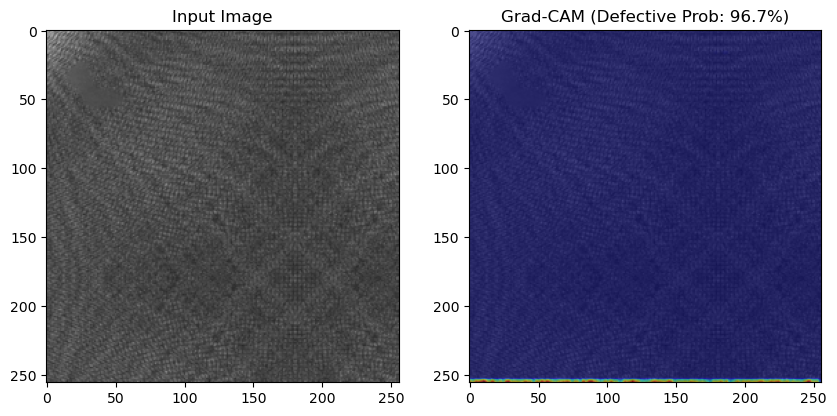

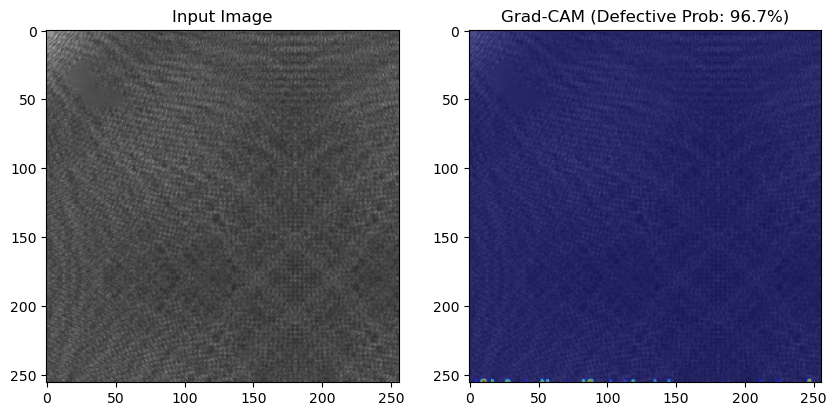

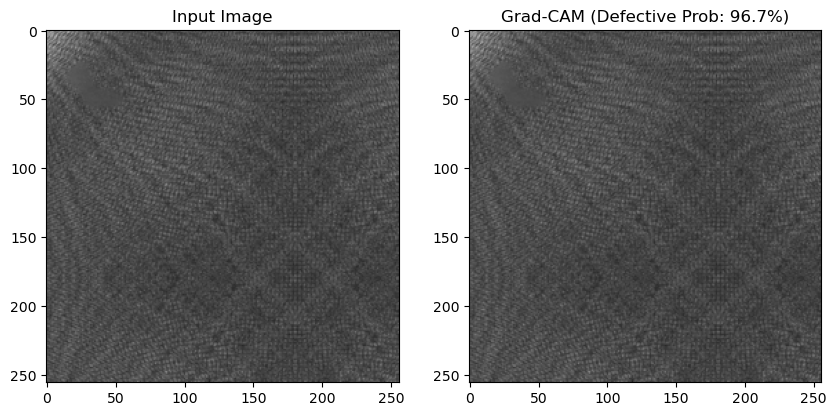

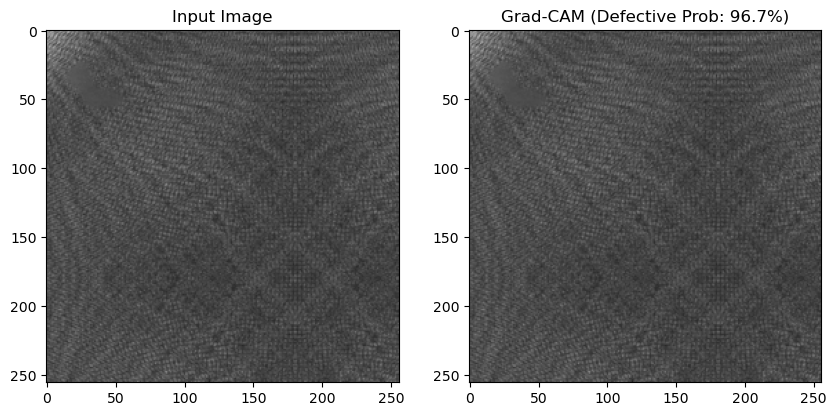

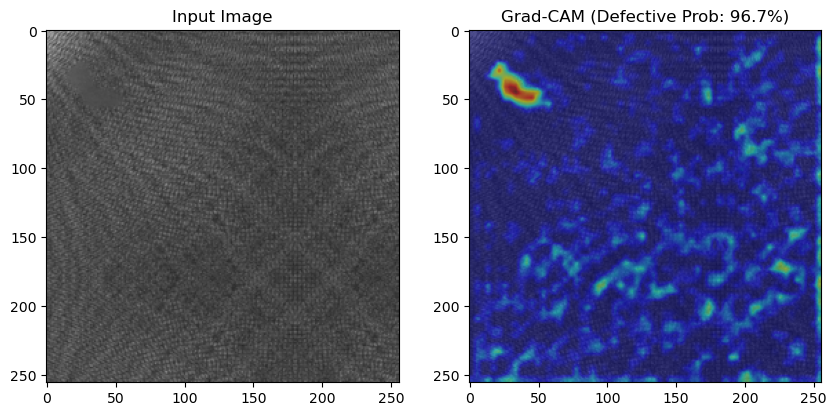

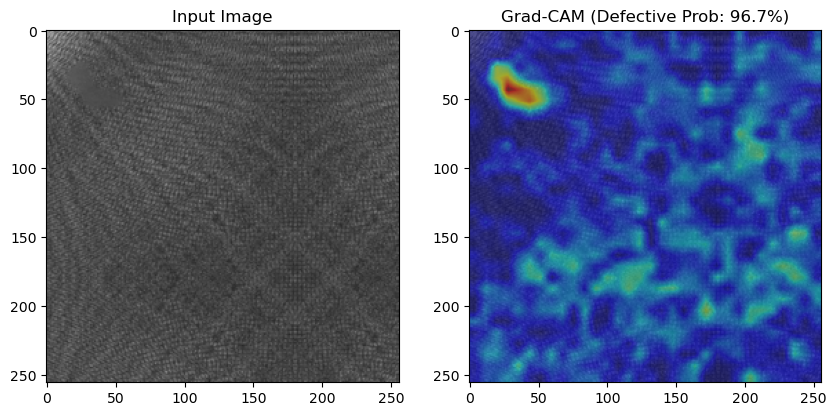

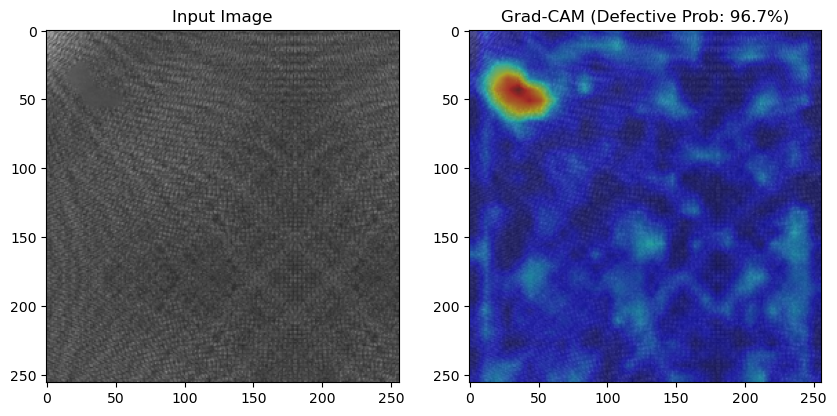

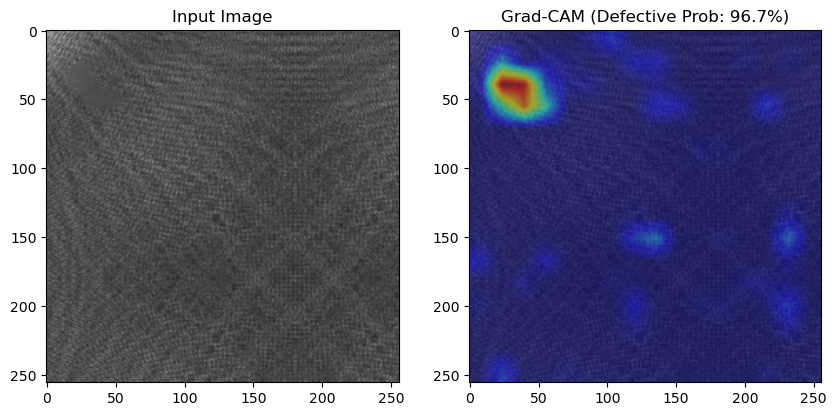

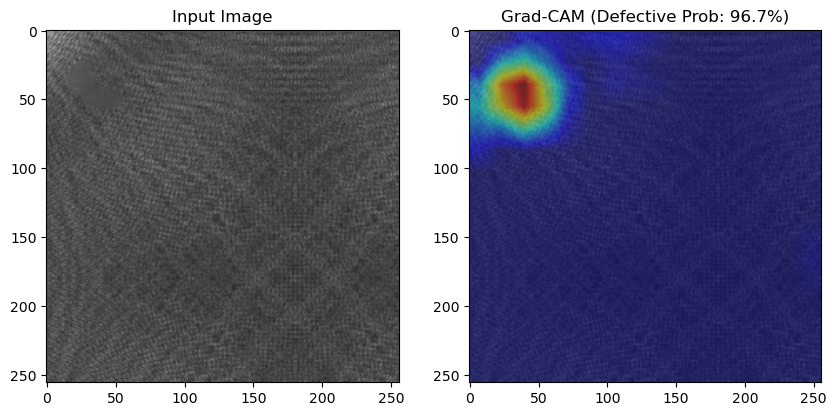

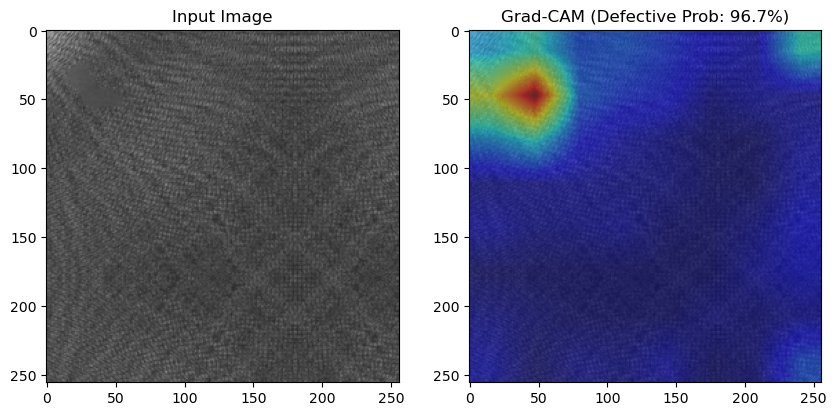

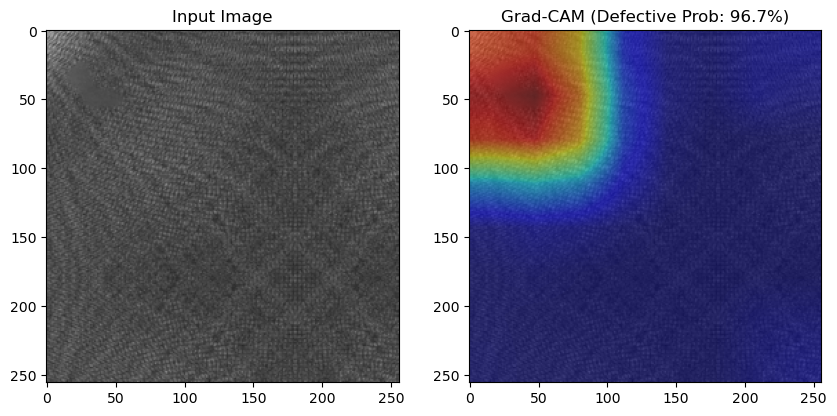

1


In [ ]:
index = 1
image, label = test_dataset[index][0].unsqueeze(0), test_dataset[index][1]
show_grad_cam(model, image, 6)